## Data Analysis of Students Performance

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [11]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [13]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

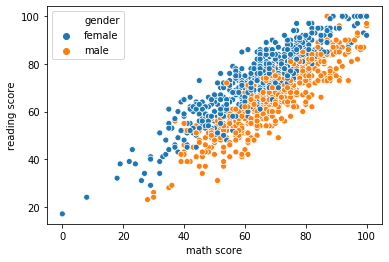

In [15]:
sns.scatterplot(x= "math score", y= "reading score",hue= "gender", data= df);

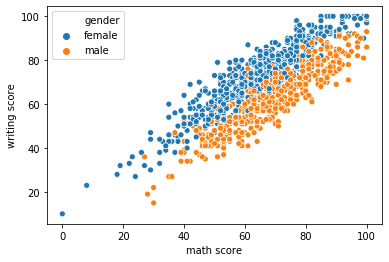

In [16]:
sns.scatterplot(x= "math score", y= "writing score",hue= "gender", data= df);

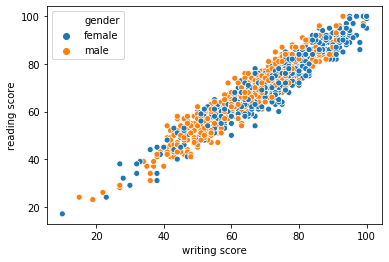

In [17]:
sns.scatterplot(x= "writing score", y= "reading score",hue= "gender", data= df);

In [18]:
df["math score"].mean()

66.089

In [19]:
df["reading score"].mean()

69.169

In [20]:
df["writing score"].mean()

68.054

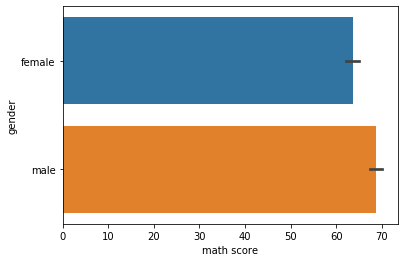

In [21]:
sns.barplot(x= "math score", y= "gender", data= df);

#### >>> Erkeklerin Matematik notu Kızlara göre daha iyi.

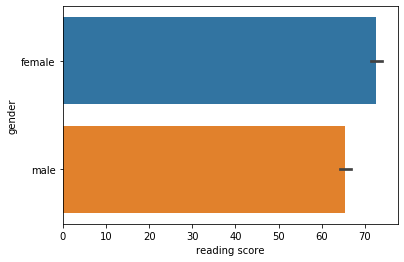

In [22]:
sns.barplot(x= "reading score", y= "gender", data= df);

#### >>> Erkeklerin Reading notu Kızlara göre daha kötü.

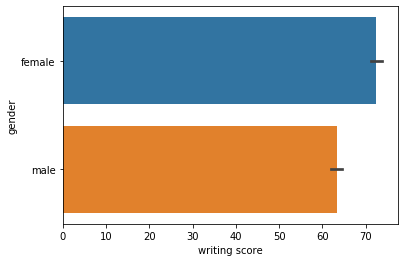

In [23]:
sns.barplot(x= "writing score", y= "gender", data= df);

#### >>> Erkeklerin Writing notu Kızlara göre daha kötü.

#### >>> Erkeklerin genelinin sayısalı kızların genelinin sayısalından daha iyi.

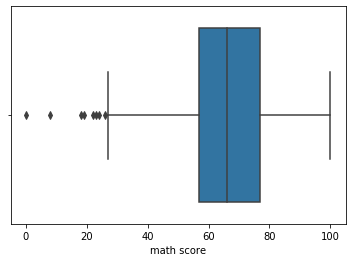

In [27]:
sns.boxplot(x= df["math score"]);

In [31]:
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1 

In [32]:
Q1 # mavi kutunun üzerindeki sol dikey siyah çizgisi

57.0

In [33]:
Q3 # mavi kutunun üzerindeki sağ dikey siyah çizgisi   

77.0

In [34]:
IQR

20.0

In [35]:
alt_sinir = Q1 - 1.5*IQR 

In [38]:
alt_sinir # Sol dikey siyah çizgi

27.0

In [40]:
aykiri_deger = (df["math score"] < alt_sinir)
aykiri_deger.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: math score, dtype: bool

In [42]:
df_mathscore = df["math score"]
df_mathscore[aykiri_deger]

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

#### >>> Belirlemiş olduğumuz alt sinirin altında olan Aykiri Değerler.

In [56]:
type(df_mathscore) # DataFrame haline getireceğiz.
df_mathscore = pd.DataFrame(df_mathscore)

In [61]:
math_df = df_mathscore[~((df_mathscore < (alt_sinir))).any(axis = 1)]
math_df.head(10)

,math score
0,72
1,69
2,90
3,47
4,76
5,71
6,88
7,40
8,64
9,38


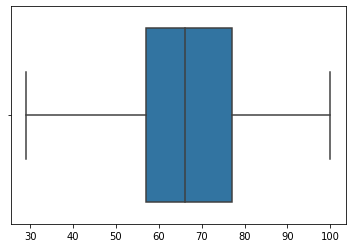

In [62]:
sns.boxplot(x= math_df);

#### >>> Böylelikle Aykiri Değerleri alt sinira göre doldurduk.

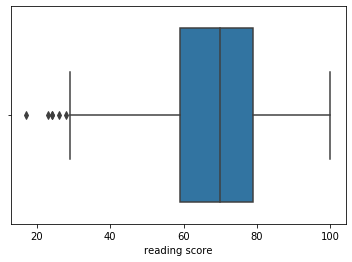

In [63]:
sns.boxplot(x= df["reading score"]);

In [86]:
Q1 = df["reading score"].quantile(0.25)
Q3 = df["reading score"].quantile(0.75)
IQR = Q3 - Q1 

alt_sinir_r = Q1 - 1.5*IQR 
aykiri_deger_r = (df["reading score"] < alt_sinir_r)
df_readingscore = df["reading score"]
df_readingscore[aykiri_deger_r]

59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64

In [87]:
type(df_readingscore)

pandas.core.series.Series

In [88]:
df_readingscore = pd.DataFrame(df_readingscore)
type(df_readingscore)

pandas.core.frame.DataFrame

In [113]:
reading_df = df_readingscore[~((df_readingscore <= (alt_sinir_r))).any(axis = 1)]
reading_df.head(10)

,reading score
0,72
1,90
2,95
3,57
4,78
5,83
6,95
7,43
8,64
9,60


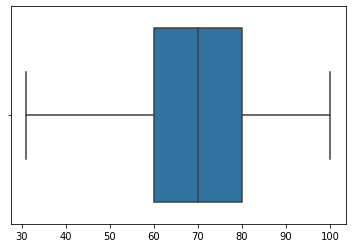

In [114]:
sns.boxplot(x= reading_df);

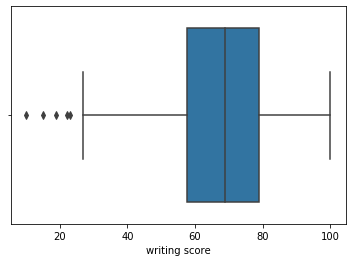

In [115]:
sns.boxplot(x= df["writing score"]);

In [116]:
Q1 = df["writing score"].quantile(0.25)
Q3 = df["writing score"].quantile(0.75)
IQR = Q3 - Q1 

In [117]:
alt_sinir_w = Q1 - 1.5*IQR 

In [118]:
aykiri_deger_w = (df["writing score"] < alt_sinir_w)
df_writingscore = df["writing score"]
df_writingscore.head(10)

0    74
1    88
2    93
3    44
4    75
5    78
6    92
7    39
8    67
9    50
Name: writing score, dtype: int64

In [119]:
alt_sinir_w

25.875

In [120]:
type(df_writingscore)

pandas.core.series.Series

In [121]:
df_writingscore = pd.DataFrame(df_writingscore)
type(df_writingscore)

pandas.core.frame.DataFrame

In [122]:
writing_df = df_writingscore[~((df_writingscore < (alt_sinir_w))).any(axis = 1)]
writing_df.head(10)

,writing score
0,74
1,88
2,93
3,44
4,75
5,78
6,92
7,39
8,67
9,50


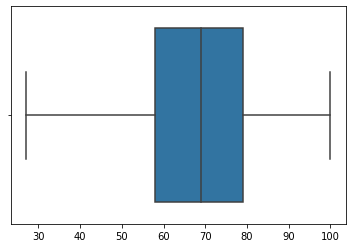

In [123]:
sns.boxplot(x= writing_df);

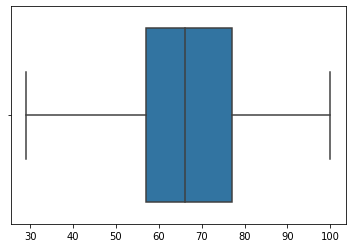

In [125]:
sns.boxplot(x= math_df);

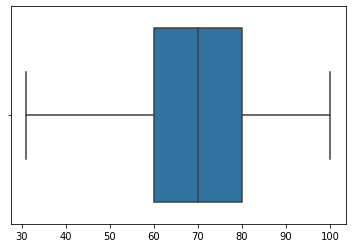

In [126]:
sns.boxplot(x= reading_df);

#### >>> Böylelikle sınav sonuçları üzerinden tüm aykırı değerlerden kurtulmuş olduk.

In [128]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


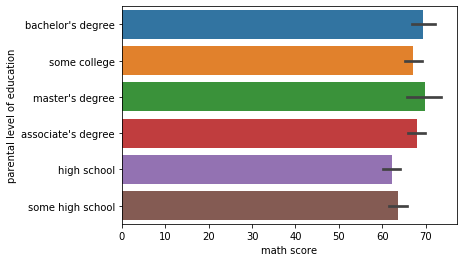

In [130]:
sns.barplot(x= "math score", y= "parental level of education", data= df);

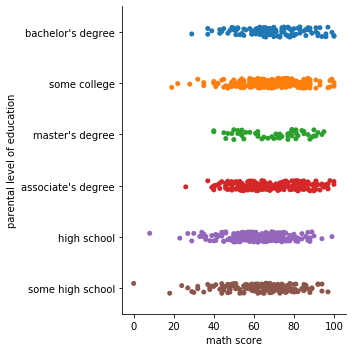

In [131]:
sns.catplot(x= "math score", y= "parental level of education", data= df);  

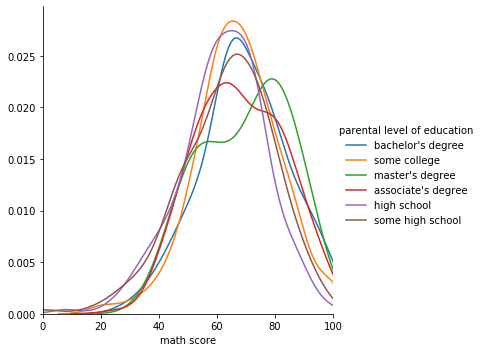

In [134]:
(sns
 .FacetGrid(df,
             hue= "parental level of education", 
             height= 5,
             xlim = (0, 100))
.map(sns.kdeplot, "math score", shade= False)
.add_legend()
);

In [138]:
df.groupby("parental level of education")["math score"].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [140]:
df.groupby("gender")["math score"].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

#### >>> Sadece iki değişken seçip aralarındaki korelasyonu inceleme

In [142]:
df[["math score","gender"]].corr()

,math score
math score,1.0


###### >>> Korelasyon katsayısı, değişkenler arasındaki ilişkiyi göstermek için kullanılan bir değerdir. Değişken, aşağıdaki formülle hesaplandığında -1 ile 1 arasında bir değer alır. Negatif değerler negatif ilişkiyi, pozitif değerler ise pozitif ilişki olduğunu gösterir. Değerler 1 veya -1 olduğunda mükemmel bir ilişki vardır. 
###### >>> Değerler 0'a yaklaştıklarında değişkenlerin aralarındaki ilişki de azalır.